In [2]:
import simu_spectrum
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn
from func_search import *
plt.style.use('ggplot')

In [3]:
peak_info = np.array([[30, 2.5, 4000], [36, 3, 3000], [70, 3, 2000], [110, 4, 1000]])
spectrum = simu_spectrum.simu_spectrum(peak_info)

## Test of smoothing funcitons    

d:\Conda\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(
e:\Gamut\func_smooth.py:123: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sigma = np.median(np.abs(coefficients)[-1]) / 0.6745 # Donoho's rule


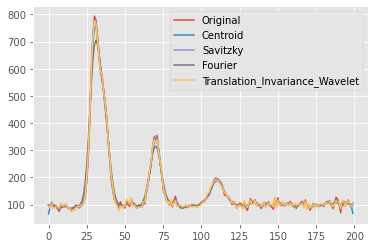

In [4]:
import func_smooth

spe_centroid = func_smooth.Centroid(spectrum, half_width=2) # classic 5-point centroid smoothing
spe_savitzky = func_smooth.Savitzky(spectrum, half_width=3, order=2) # Savitzky-Golay smoothing
spe_fourier = func_smooth.Fourier(spectrum, type='gauss', fraction=0.2, sigma_erg=2) # Fourier smoothing
spe_trans_invar_wavelet = func_smooth.Translation_Invariance_Wavelet(spectrum, times=3) # Translation-Invariance Wavelet smoothing
spe_smooth = [spectrum, spe_centroid, spe_savitzky, spe_fourier, spe_trans_invar_wavelet]
spe_label = ['Original', 'Centroid', 'Savitzky', 'Fourier', 'Translation_Invariance_Wavelet']
for i, spe in enumerate(spe_smooth):
    plt.plot(spe, label=spe_label[i])
plt.legend()

Score 1：Least-sqaure compared to original spectrum

In [5]:
print('Method', 'Score')
for i, spe in enumerate(spe_smooth):
    score = np.sum((spe - spectrum)**2/spectrum**2) / len(spectrum)
    print(spe_label[i], score)

Method Score
Original 0.0
Centroid 0.005598511757873015
Savitzky 0.005230332739680151
Fourier 0.010286103708467808
Translation_Invariance_Wavelet 0.00345694105661314


Score2: Peak area of three main peaks with designated peak region

In [6]:
print('Method', 'Areas')
for i, spe in enumerate(spe_smooth):
    areas = []
    for j, peak in enumerate(peak_info):
        x0, s, area = peak
        area = np.sum(spe[int(x0-3*s):int(x0+3*s)]) - (np.sum(spe[int(x0+3*s):int(x0+3*s)+3])+np.sum(spe[int(x0-3*s)-3:int(x0-3*s)]))/6 *len(spe[int(x0-3*s):int(x0+3*s)])
        areas.append(area)
    print(spe_label[i], areas)

Method Areas
Original [3389.5542190413826, 5731.986302717506, 1968.5068762294798, 1066.4273667148432]
Centroid [3377.824974029003, 5495.684605581495, 1926.782593513142, 1050.3992636812195]
Savitzky [3396.9750379274183, 5695.083723334298, 1952.8320990079412, 1058.9739807652345]
Fourier [3339.5924785006364, 4963.7750221018605, 1864.0254074096492, 1016.5483991783121]
Translation_Invariance_Wavelet [3397.727864095941, 5728.227478123255, 1994.5174324066834, 1108.942726915735]


Score3: Signal-Noise Ratio

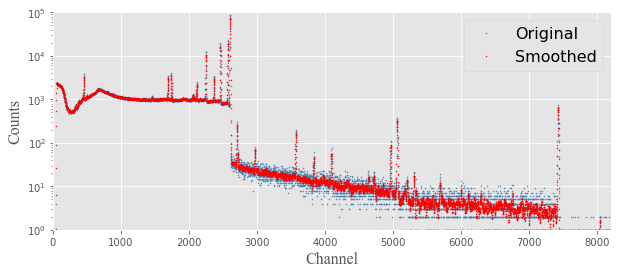

In [7]:
with open(r'D:\User\Spectra\GM20燃耗球\GM20燃耗球\2020-07-21-1800s-026-目标球（反）.Chn', 'r', encoding='utf-8') as fileopen:
    spectrum_26 = fileopen.readlines()
# spectrum_26 = [int(line.strip()) for line in spectrum_26]
index = 12
list_spectrum = []
while True:
    try:
        list_spectrum.append(int(spectrum_26[index].strip()))
        index += 1
    except:
        break
list_spectrum = np.array(list_spectrum)
spectrm_fourier = func_smooth.Fourier(list_spectrum, type='gauss', fraction=0.2, sigma_erg=2)
plt.figure(figsize=(10, 4))
plt.plot(list_spectrum, marker='.', markersize=1, linestyle='', color='steelblue', label='Original')
plt.plot(spectrm_fourier, marker='.', markersize=1, linestyle='', color='red', label='Smoothed')
plt.yscale('log')
plt.xlabel('Channel', fontdict={'size': 16, 'family': 'Times New Roman'})
plt.ylabel('Counts', fontdict={'size': 16, 'family': 'Times New Roman'})
plt.xlim([0, 8200])
plt.ylim([1, 1e5])
plt.legend(fontsize=16)

In [8]:
l = [1,2,3,6,7,8,9,12,13,14]
l2 = [1,2,3,6,7,1,2,3,6,7,8]
list_split(l), threshold_split(l2, 4)

([[1, 2, 3], [6, 7, 8, 9], [12, 13, 14]],
 [array([3, 4], dtype=int64), array([ 8,  9, 10], dtype=int64)])

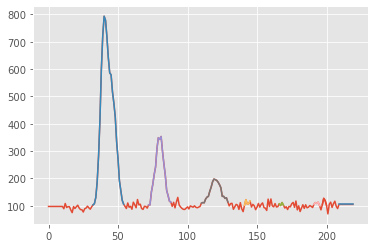

In [13]:
counts = spectrum
counts = np.pad(counts, 10, 'edge')
regions = threshold_split(counts, 100)
regions = [region for region in regions if len(region)>3]
plt.plot(counts)
for region in regions:
    plt.plot(region, counts[region])
    

In [14]:
smoothed, M = Differential(counts, 3, 5, 0)
smoothed = np.pad(smoothed[10:-10], 10, 'edge')
smoothed2, M = Differential(smoothed, 3, 5, 0)
square_smoothed = transform(M**2, counts)
snip = SNIP(smoothed, 6, 'negative')

# plt.plot(smoothed)
# for i in range(6, 18):
#     snip = SNIP(smoothed, i, 'negative')
#     plt.plot(snip)
# plt.yscale('log')
# plt.plot(counts-snip*0.7)
# plt.plot(smoothed)
# plt.plot(square_smoothed)    

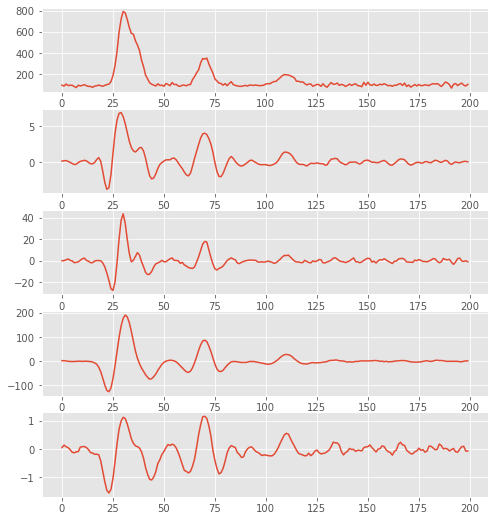

In [55]:
gauss = Gauss(smoothed2)
diff, _ = Differential(counts, order=3, half_width=4, derive_order=2)
cov = Covariance(counts)
cov2 = Covariance(counts) / square_smoothed
cov3 = Covariance(counts) / square_smoothed**0.5
szac = SZAC(counts, 6, 5)

prominence_spectrums = [counts, gauss, -diff, cov, szac]

def repeat(basic_func):
    def decorator(func):
        if basic_func is None:
            def wrapper(*args, **kwargs):
                for spectrum in prominence_spectrums:
                    func(spectrum, *args, **kwargs)
        else:
            def wrapper(*args, **kwargs):
                for spectrum in prominence_spectrums:
                    basic_func(spectrum, *args, **kwargs)         
        return wrapper
    return decorator

fig, axes = plt.subplots(len(prominence_spectrums), 1, figsize=(8, 9))
for i, spec in enumerate(prominence_spectrums):
    axes[i].plot(spec[10: -10])

In [56]:
groups = threshold_split(cov, 5)
print(groups)
for i, group in enumerate(groups):
    median = locate_peak(cov, group)
    sideextrema = locate_side_extrema(cov, median)

[array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype=int64), array([76, 77, 78, 79, 80, 81, 82, 83, 84], dtype=int64), array([116, 117, 118, 119, 120, 121, 122, 123, 124], dtype=int64)]


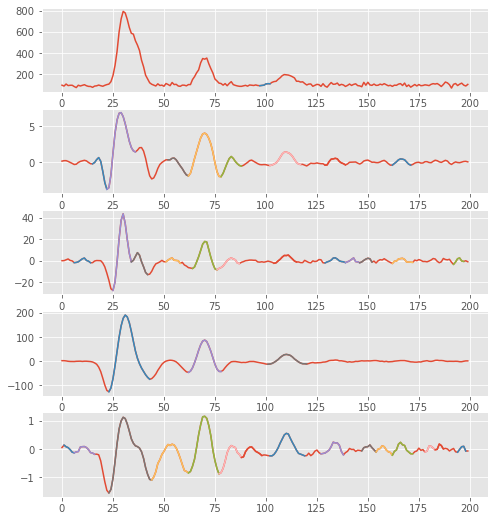

In [57]:
fig, axes = plt.subplots(len(prominence_spectrums), 1, figsize=(8, 9))

for i, spec in enumerate(prominence_spectrums):
    spec = spec[10: -10]
    groups = threshold_split(spec, spec.max()*0.05)
    
    axes[i].plot(spec)
    for j, group in enumerate(groups):
        median = locate_peak(spec, group)
        sideextrema = locate_side_extrema(spec, median)
        axes[i].plot(np.arange(sideextrema[0], sideextrema[1]), spec[sideextrema[0]: sideextrema[1]])


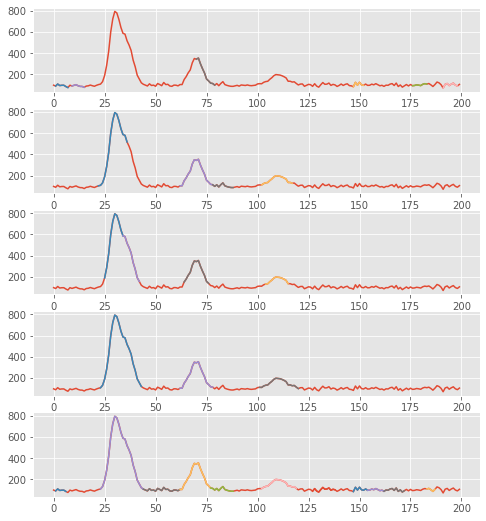

In [58]:
fig, axes = plt.subplots(len(prominence_spectrums), 1, figsize=(8, 9))

for i, spec in enumerate(prominence_spectrums):
    spec = spec[10: -10]
    groups = threshold_split(spec, spec.max()*0.1)
    
    axes[i].plot(counts[10: -10])
    for j, group in enumerate(groups):
        median = locate_peak(spec, group)
        sideextrema = locate_side_extrema(spec, median)
        axes[i].plot(np.arange(sideextrema[0], sideextrema[1]), counts[10: -10][sideextrema[0]: sideextrema[1]])


NameError: name 'spec3' is not defined

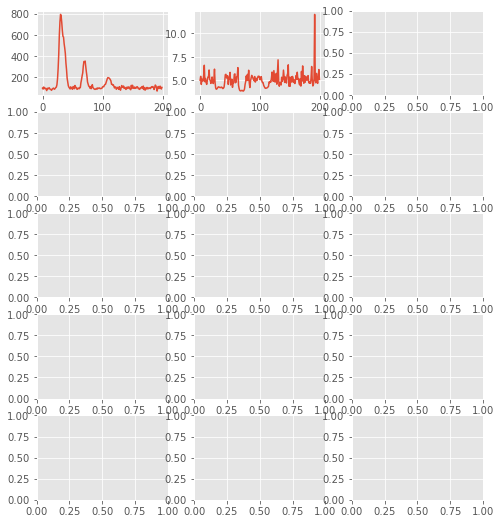

In [59]:
fig, axes = plt.subplots(len(prominence_spectrums), 3, figsize=(8, 9))

for i, spec in enumerate(prominence_spectrums):
    spec2 = spec / (counts-snip*0.5) ** 0.8
    axes[i][0].plot(spec[10: -10])
    axes[i][1].plot(spec2[10: -10])
    axes[i][2].plot(spec3[10: -10])

# Test of advanced convolution method

In [ ]:
def gauss(i, a, s, A):
    return A * np.exp( -(i-a)**2 / 2 / s**2 )

def dgauss(i, a, s, A):
    return -(i-a) / s**2 * gauss(i, a, s, A) 

def Conv(counts, beta, conv_func, *kargs, **kwargs):
    conv_kernel = conv_func(np.arange(-beta, beta+1),*kargs, **kwargs)
    conv1 = np.zeros(counts.shape)
    for y in np.arange(counts.shape[0]):
        # print(y, conv_kernel[max(beta-y, 0): ], counts[max(y-beta, 0): y+beta+1])
        prod = conv_kernel[max(beta-y, 0): min(2*beta+1, counts.shape[0]+beta-y)] * counts[max(y-beta, 0): y+beta+1]
        conv1[y] = prod.sum()
    return conv1



In [ ]:
# x = np.arange(300)
# counts = simu_spectrum.simu_spectrum(length=300)
# # counts = simu_spectrum.simu_spectrum(length=300, peak_info=[[100, 4, 4000], [120, 5, 2000]])
# plt.subplot(211)
# plt.plot(counts)
# plt.subplot(212)
# plt.plot(gauss(x, 30, 3, 100))
# plt.plot(dgauss(x, 30, 3, 100))

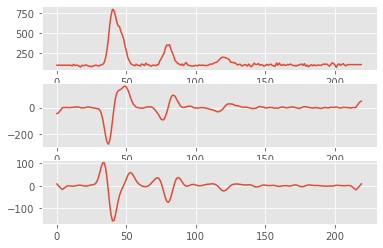

In [ ]:
conv1 = Conv(counts, 4, dgauss, 0, 4, 1)
conv2 = Conv(conv1, 4, dgauss, 0, 4, 1)
plt.subplot(311)
plt.plot(counts)
plt.subplot(312)
plt.plot(conv1)
plt.subplot(313)
plt.plot(conv2)

In [ ]:
lefts, _ = sgn._peak_finding.find_peaks(-conv1, height=10, width=2)
rights, _ = sgn._peak_finding.find_peaks(conv1, height=10, width=2)
lefts = find_peaks(-conv1, window_size=1)
# rights = find_peaks(conv1, window_size=1)
# lefts, rights


TypeError: find_peaks() got an unexpected keyword argument 'window_size'

In [ ]:
# plt.plot(lefts, conv1[lefts], '.')
# plt.plot(rights, conv1[rights], '.')
# plt.plot(conv1)
plt.plot(lefts, -conv2[lefts], '.')
plt.plot(rights, -conv2[rights], '.')
plt.plot(-conv2)

In [ ]:
def dConv(counts, minbeta, maxbeta, peak, conv_func, *kargs, **kwargs):
    
    while True:
        max_conv2s = []
        betas = np.linspace(minbeta, maxbeta, 10)
        for s in betas:
            conv1 = Conv(counts, conv_func=conv_func, s=s, *kargs, **kwargs)
            conv2 = -Conv(conv1, conv_func=conv_func, s=s, *kargs, **kwargs)
            max_conv2s.append(conv2[peak])
        index = max_conv2s.index(max(max_conv2s))
        minbeta, maxbeta = betas[max(index-1, 0)], betas[min(index+1, 9)]
        if abs(maxbeta / minbeta-1) < 1E-5:
            return betas[index], max_conv2s[index]
        
for left, right in zip(lefts, rights):
    peaks = sgn._peak_finding.find_peaks(-conv2[left: right], height=1, width=1)[0] + left
    sigma, I = dConv(counts, 0.1, 10, peaks[0], conv_func=dgauss, beta=10, A=1, a=0)
    print(sigma, I, 9*I*sigma/(6*np.pi)**0.5)
    


In [ ]:
conv12 = Conv(counts, 10, dgauss, 0, 2.5, 1)
conv22 = -Conv(conv1, 10, dgauss, 0, 2.5, 1)
conv2[30]

In [ ]:
from func_search import *
import simu_spectrum
import matplotlib.pyplot as plt

In [ ]:
counts = simu_spectrum.simu_spectrum(peak_info=[[100, 4, 4000], [110, 5, 3000]])
for i in range(1,4):
    deri = Differential(counts, 3, 5, i)[0]
    plt.plot(deri)

In [ ]:
n = 10
mm = 2*n
m = 2
x_n, y_mm  = np.meshgrid(np.arange(-n, n+1), np.arange(mm+1))
X = x_n**y_mm
Y = np.zeros(mm+1)
Y[m] = 1
# print(X, Y)
k = np.linalg.inv(X.T@X) @ X.T @ Y 
# k = k*np.math.factorial(m)
print(k, X@k)
for mmi in range(mm+1):
    print(mmi, sum(k*np.arange(-n, n+1)**mmi))
y1 = transform(k, counts)
y2 = Differential(counts, mm, n, m)[0]
# plt.plot(counts)
plt.plot(y1)
plt.plot(y2)